# Comparison between Wave propagation Method (WPM) and Beam Propagation Method (BPM)

In [1]:
from diffractio import sp, nm, plt, np, mm, degrees, um
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_fields_XZ import Scalar_field_XZ
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from diffractio.scalar_masks_X import Scalar_mask_X

from diffractio.utils_math import ndgrid

import matplotlib.cm as cm

number of processors: 8


In [2]:
from matplotlib import rcParams
rcParams['figure.figsize']=[8,5]
rcParams['figure.dpi']=125

In [3]:
logarithm_drawing=False

## BPM

In [4]:
from diffractio import sp, nm, plt, np, mm, degrees, um
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_fields_XZ import Scalar_field_XZ
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from diffractio.scalar_masks_X import Scalar_mask_X

from diffractio.utils_math import ndgrid

import matplotlib.cm as cm

## lens

In [5]:
x0 = np.linspace(-500*um, 500*um, 1024*4)
z0 = np.linspace(-0.1 * mm, 1.25*mm, 1024*2)
wavelength = 25 * um

In [6]:
u0 = Scalar_source_X(x0, wavelength)
u0.plane_wave(A=1, theta=0 * degrees)

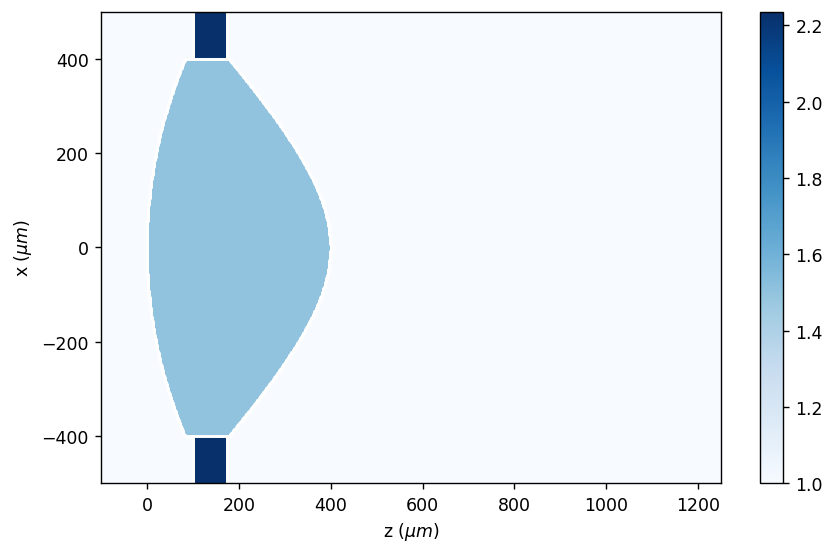

In [7]:
lens = Scalar_mask_XZ(x0, z0, wavelength, n_background=1, info='')
ipasa, conds= lens.aspheric_lens(r0=(0*mm,0*mm), angle=(0*degrees, (0*mm,0*mm)), 
                                   refraction_index=1.5, 
                                   cx=(1/(1*mm),-1/(.25*mm)),Qx=(0,0), 
                                   a2=(0,1e-13), a3=(0,0), a4=(0,0),
                                   depth=.4*mm,  size=0.8*mm)

lens.slit(r0=(0,100*um),
    aperture=800*um,
    depth=75*um,
    refraction_index=1+2j)


lens.draw_refraction_index(draw_borders=True, min_incr=0.01,colormap_kind=cm.Blues, colorbar_kind='vertical');

In [8]:
lens.filter_refraction_index(type_filter=2, pixels_filtering=25);

In [9]:
lens.incident_field(u0)

In [10]:
%%time
lens.clear_field()
lens.BPM(verbose=False)

CPU times: user 1.16 s, sys: 63.6 ms, total: 1.22 s
Wall time: 1.22 s


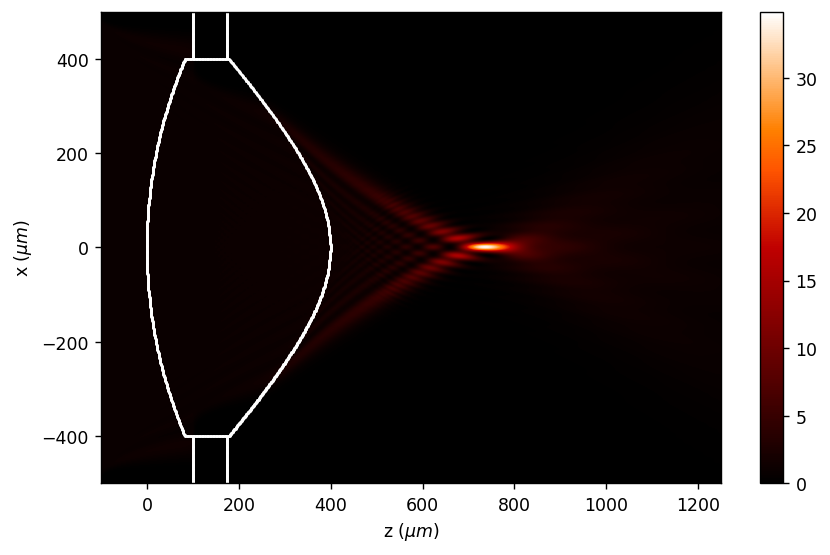

In [11]:
lens.draw(kind='intensity',logarithm=logarithm_drawing, normalize=None, draw_borders=True, colorbar_kind='vertical');

In [12]:
Intensity_BPM = lens.intensity()

### Focusing area

In [13]:
x_f_bmp,z_f_bmp = lens.search_focus()

x = -0.122 um, z = 736.908 um


In [14]:
ylim_max=25*um
zlim_max=300*um

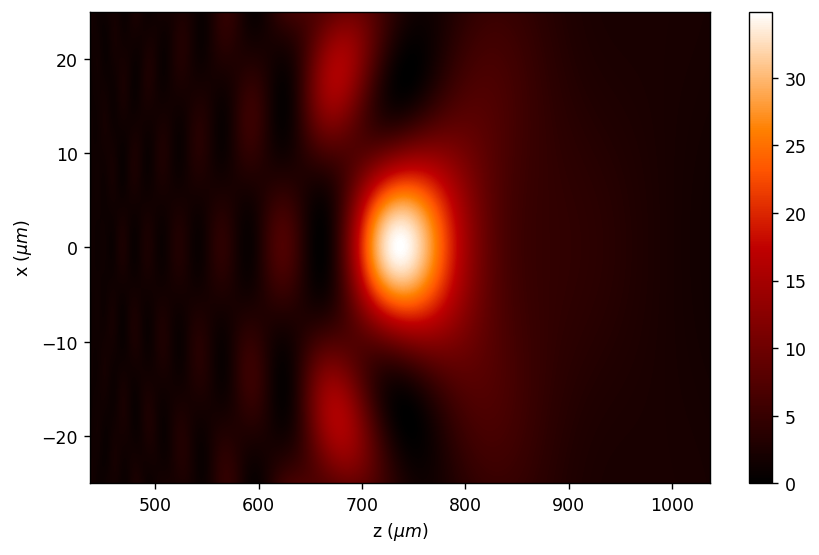

In [15]:
lens.draw(kind='intensity',logarithm=logarithm_drawing,  colorbar_kind='vertical')
plt.ylim(-ylim_max,ylim_max)
plt.xlim(z_f_bmp-zlim_max,z_f_bmp+zlim_max);

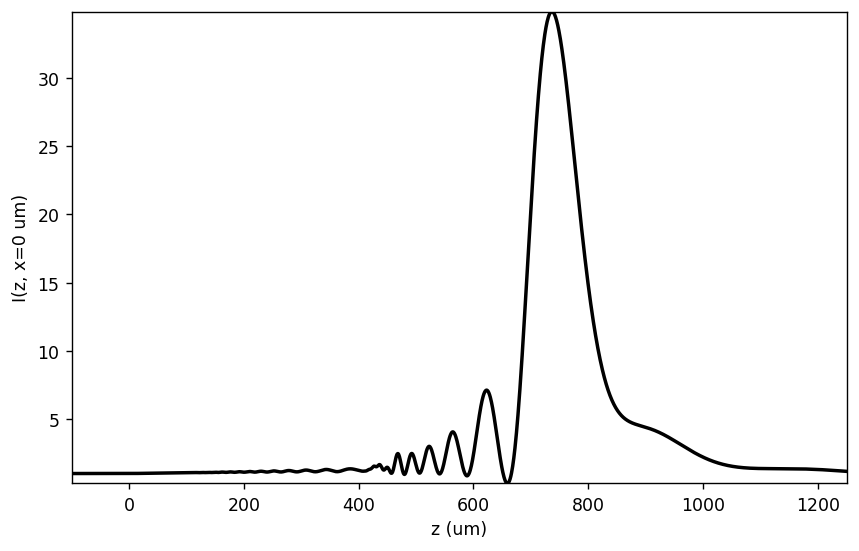

In [16]:
lens.profile_longitudinal(kind='intensity', logarithm=logarithm_drawing, x0=0);

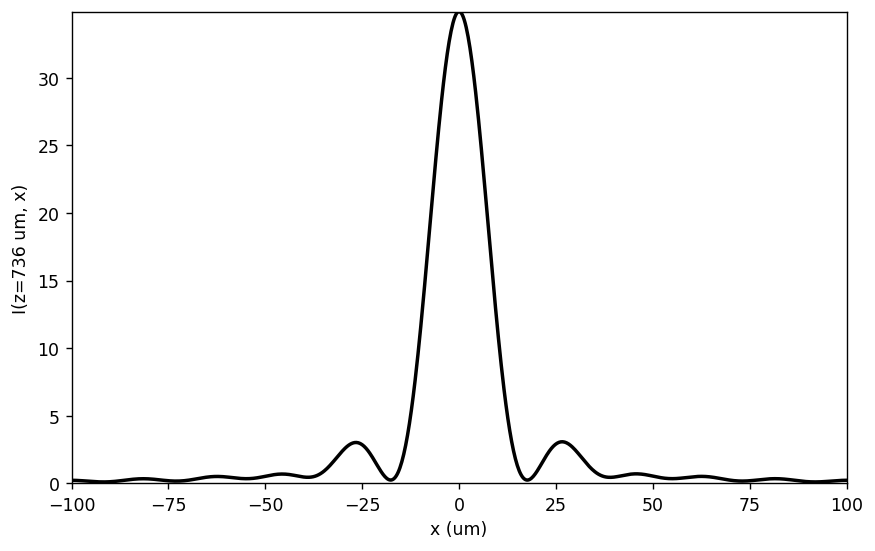

In [17]:
lens.profile_transversal(kind='intensity', logarithm=logarithm_drawing, z0=z_f_bmp)
plt.xlim(-100,100);

## WPM

In [18]:
x0 = np.linspace(-500*um, 500*um, 1024*4)
z0 = np.linspace(-0.1 * mm, 1.25*mm, 1024*2)
wavelength = 2 * um

In [19]:
u0 = Scalar_source_X(x0, wavelength)
u0.plane_wave(A=1, theta=0 * degrees)

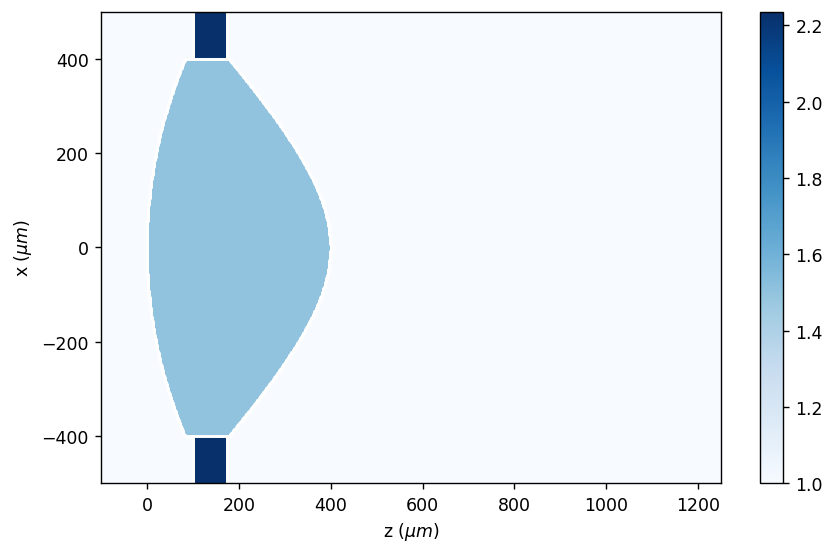

In [20]:
lens2 = Scalar_mask_XZ(x0, z0, wavelength, n_background=1, info='')
ipasa, conds= lens2.aspheric_lens(r0=(0*mm,0*mm), angle=(0*degrees, (0*mm,0*mm)), 
                                   refraction_index=1.5, 
                                   cx=(1/(1*mm),-1/(.25*mm)),Qx=(0,0), 
                                   a2=(0,1e-13), a3=(0,0), a4=(0,0),
                                   depth=.4*mm,  size=0.8*mm)

lens2.slit(r0=(0,100*um),
    aperture=800*um,
    depth=75*um,
    refraction_index=1+2j)


lens2.draw_refraction_index(draw_borders=True, min_incr=0.01,colormap_kind=cm.Blues, colorbar_kind='vertical');

In [21]:
# lens2.filter_refraction_index(type_filter=2, pixels_filtering=25);

In [22]:
lens2.incident_field(u0)

In [23]:
lens2.clear_field()
lens2.WPM(verbose=False)

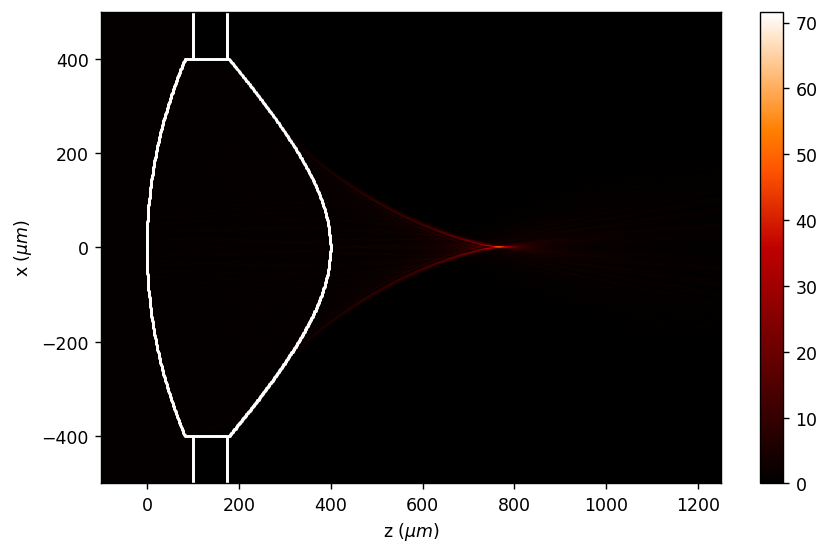

In [24]:
lens2.draw(kind='intensity',logarithm=logarithm_drawing, normalize=None, draw_borders=True,
            colorbar_kind='vertical');

In [25]:
Intensity_WPM = lens2.intensity()

In [26]:
x_f_wpm,z_f_wpm = lens2.search_focus()

x = -0.122 um, z = 763.947 um


In [27]:
ylim_max=25*um
zlim_max=300*um

### Focusing area

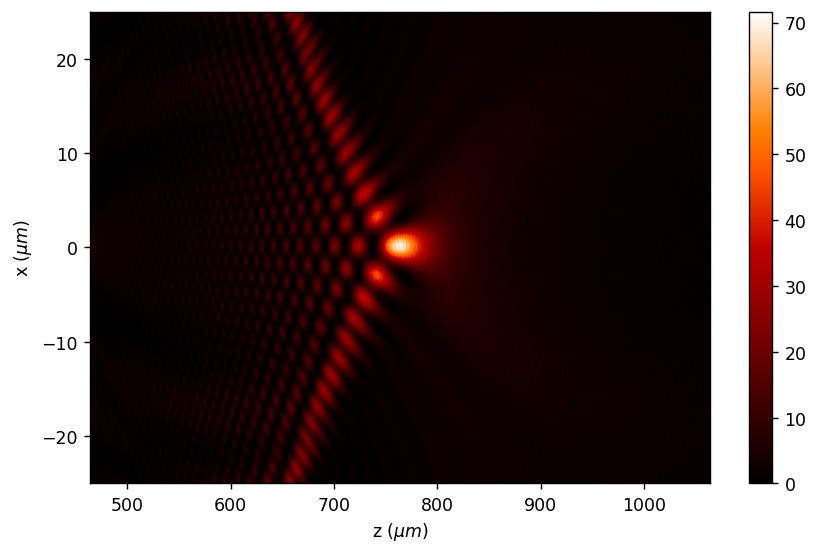

In [28]:
lens2.draw(kind='intensity',logarithm=logarithm_drawing,  colorbar_kind='vertical')
plt.ylim(-ylim_max,ylim_max)
plt.xlim(z_f_wpm-zlim_max,z_f_wpm+zlim_max);

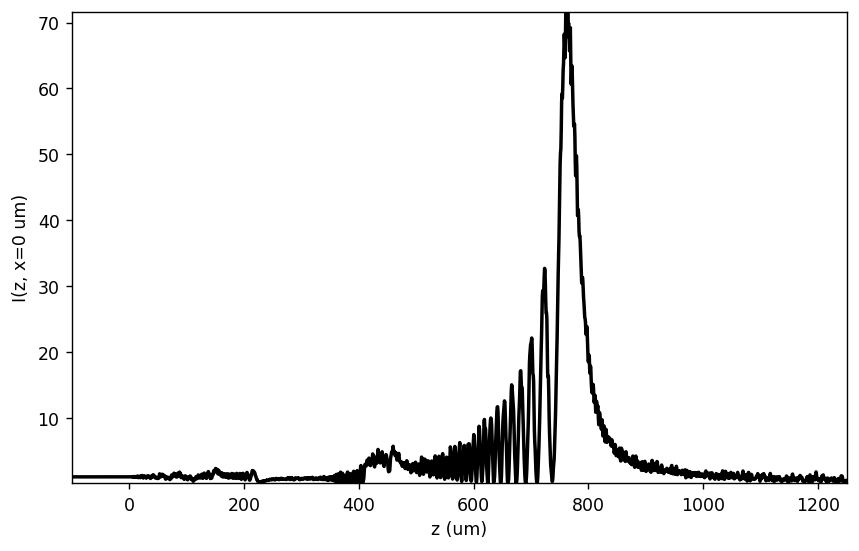

In [29]:
lens2.profile_longitudinal(kind='intensity', logarithm=logarithm_drawing, x0=0);

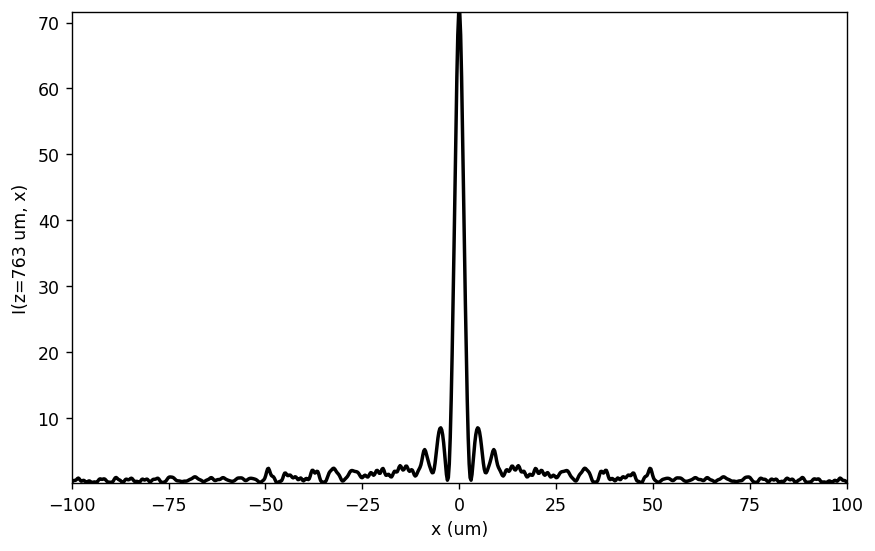

In [30]:
lens2.profile_transversal(kind='intensity', logarithm=logarithm_drawing, z0=z_f_wpm)
plt.xlim(-100,100);

## Diferences

In [31]:
Intensity_diff = (Intensity_WPM/Intensity_WPM.max() - Intensity_BPM/Intensity_BPM.max())

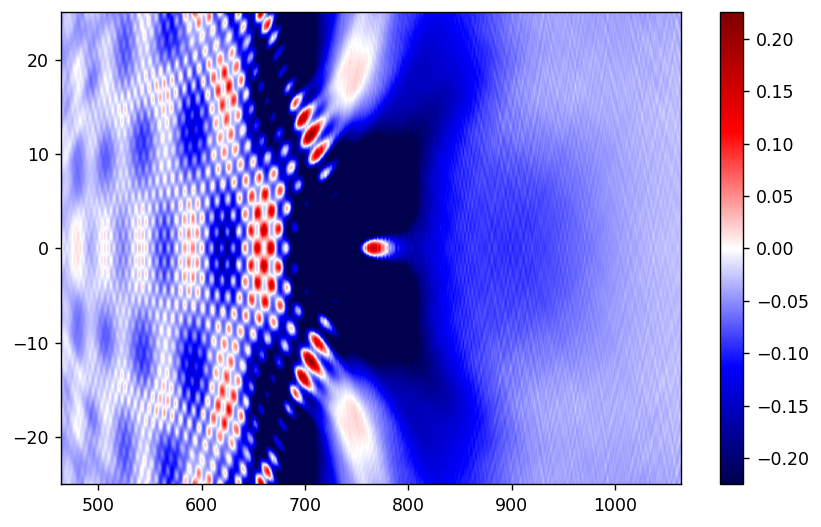

In [32]:
extension = [lens2.z[0], lens2.z[-1], lens2.x[0], lens2.x[-1]]

h1=plt.imshow(Intensity_diff,
            interpolation='bilinear',
            aspect='auto',
            origin='lower',
            extent=extension)
plt.axis(extension)


h1.set_cmap(cm.seismic)  # OrRd # Reds_r gist_heat
h1.set_clim(-Intensity_diff.max(), Intensity_diff.max())
plt.colorbar(orientation='vertical')
plt.ylim(-ylim_max,ylim_max)
plt.xlim(z_f_wpm-zlim_max,z_f_wpm+zlim_max);

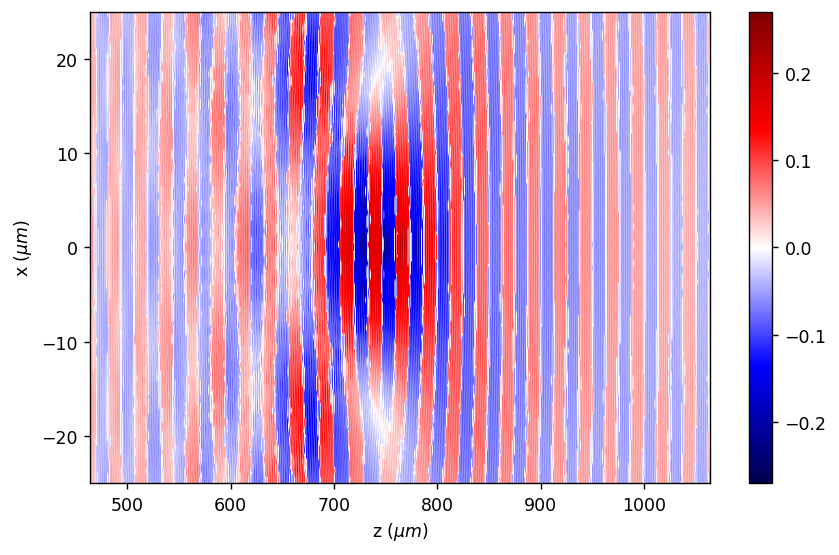

In [33]:
diff = Scalar_mask_XZ(x0, z0, wavelength, n_background=1, info='')
diff.u = lens2.u/Intensity_WPM.max()-lens.u/Intensity_BPM.max()

diff.draw(kind='amplitude',logarithm=False,  colorbar_kind='vertical')
plt.ylim(-ylim_max,ylim_max)
plt.xlim(z_f_wpm-zlim_max,z_f_wpm+zlim_max);

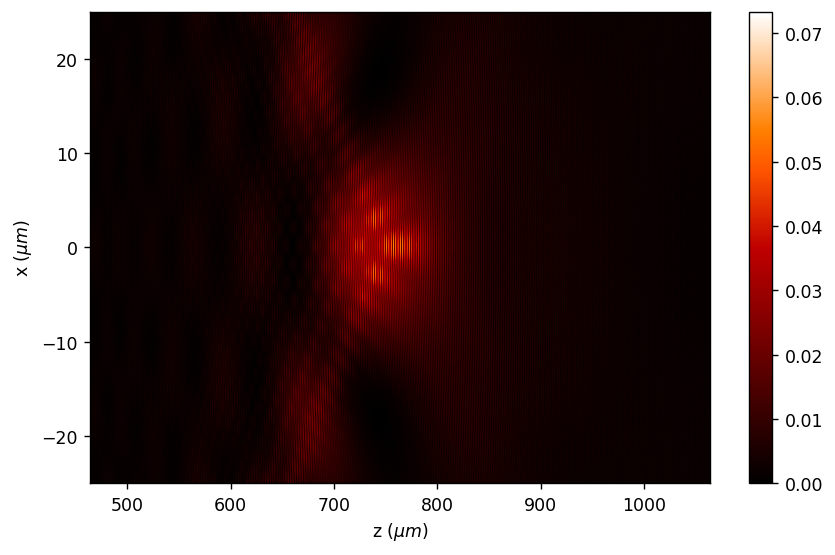

In [34]:
diff.draw(kind='intensity',logarithm=False,  colorbar_kind='vertical')
plt.ylim(-ylim_max,ylim_max)
plt.xlim(z_f_wpm-zlim_max,z_f_wpm+zlim_max);

In [38]:
# focal shift

focal_shift = z_f_wpm - z_f_bmp

print("Dz = {:2.2f} um".format(focal_shift))

Dz = 27.04 um
